In [1]:
import findspark
# need to use the correct spark version
# findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
findspark.init('/home/ubuntu/spark-3.1.1-bin-hadoop3.2')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4').getOrCreate()

In [2]:
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Reading the datasets
dataset_one = spark.read.csv('./student-math-dataset1.csv', header=True, inferSchema=True)
dataset_two = spark.read.csv('./student-math-dataset2.csv', header=True, inferSchema=True)

In [4]:
# 2.2 Describe the data
print("Dataset one structure: " + str(dataset_one.count()) + " rows, and " + str(len(dataset_one.columns)) + " columns")
print("Dataset two structure: " + str(dataset_two.count()) + " rows, and " + str(len(dataset_two.columns)) + " columns")
print("How many students inside the dataset: " + str(dataset_one.count()))

Dataset one structure: 395 rows, and 31 columns
Dataset two structure: 395 rows, and 4 columns
How many students inside the dataset: 395


In [5]:
# can print out the first line name and value
dataset_one.head()

Row(id=1, school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3.0, goout=4, Dalc=1.0, Walc=1.0, health=3.0, absences=6)

In [6]:
print("Data type inside the dataset one")
dataset_one.dtypes
# print(dataset_one.printSchema())
# print(dataset_two.printSchema())

Data type inside the dataset one


[('id', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'double'),
 ('goout', 'int'),
 ('Dalc', 'double'),
 ('Walc', 'double'),
 ('health', 'double'),
 ('absences', 'int')]

In [7]:
print("Data type inside the dataset two")
dataset_two.dtypes

Data type inside the dataset two


[('id', 'int'), ('G1', 'int'), ('G2', 'int'), ('G3', 'int')]

In [8]:
# 2.3 Explore the data
# need to see the difference between .show() vs .describe().shows()
print("Dataset one information: ")
print(dataset_one.select(dataset_one.columns[0:10]).describe().show())
print(dataset_one.select(dataset_one.columns[10:21]).describe().show())
print(dataset_one.select(dataset_one.columns[21:]).describe().show())

Dataset one information: 
+-------+------------------+------+----+------------------+-------+-------+-------+------------------+------------------+-------+
|summary|                id|school| sex|               age|address|famsize|Pstatus|              Medu|              Fedu|   Mjob|
+-------+------------------+------+----+------------------+-------+-------+-------+------------------+------------------+-------+
|  count|               395|   395| 395|               395|    395|    395|    395|               395|               395|    395|
|   mean|             198.0|  null|null|16.696202531645568|   null|   null|   null| 2.749367088607595|2.5215189873417723|   null|
| stddev|114.17092449481173|  null|null|1.2760427246056265|   null|   null|   null|1.0947351414285371|1.0882005458269433|   null|
|    min|                 1|    GP|   F|                15|      R|    GT3|      A|                 0|                 0|at_home|
|    max|               395|    MS|   M|                22|     

In [9]:
dataset_two.describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|                id|                G1|                G2|                G3|
+-------+------------------+------------------+------------------+------------------+
|  count|               395|               395|               395|               395|
|   mean|             198.0| 10.90886075949367|10.713924050632912|10.415189873417722|
| stddev|114.17092449481173|3.3191946715076686|3.7615046595560306|4.5814426109978434|
|    min|                 1|                 3|                 0|                 0|
|    max|               395|                19|                19|                20|
+-------+------------------+------------------+------------------+------------------+



Student first year grade distribution: 


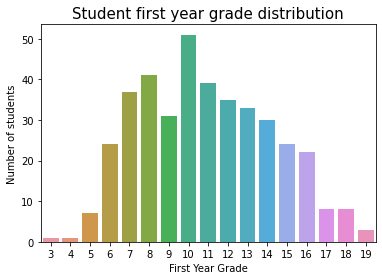

In [10]:
print("Student first year grade distribution: ")
diagram_one = sns.countplot(x = dataset_two.toPandas()['G1'])
diagram_one.set_xlabel('First Year Grade', fontsize = 10)
diagram_one.set_ylabel('Number of students', fontsize = 10)
diagram_one.axes.set_title('Student first year grade distribution', fontsize = 15)
plt.show()

Student second year grade distribution: 


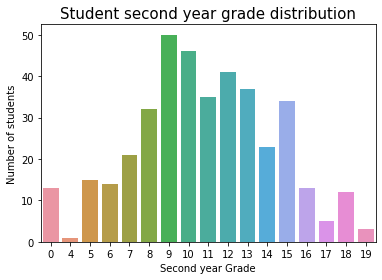

In [11]:
print("Student second year grade distribution: ")
diagram_two = sns.countplot(x = dataset_two.toPandas()['G2'])
diagram_two.set_xlabel('Second year Grade', fontsize = 10)
diagram_two.set_ylabel('Number of students', fontsize = 10)
diagram_two.axes.set_title('Student second year grade distribution', fontsize = 15)
plt.show()

Student final year grade distribution: 


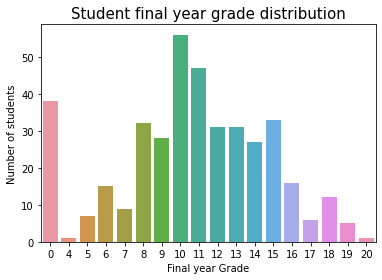

In [12]:
print("Student final year grade distribution: ")
diagram_three = sns.countplot(x = dataset_two.toPandas()['G3'])
diagram_three.set_xlabel('Final year Grade', fontsize = 10)
diagram_three.set_ylabel('Number of students', fontsize = 10)
diagram_three.axes.set_title('Student final year grade distribution', fontsize = 15)
plt.show()

Gender distribution inside the dataset: 


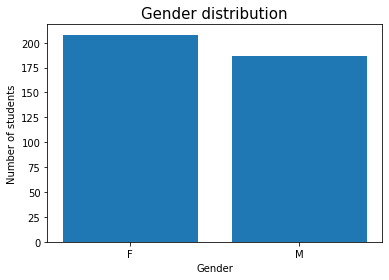

Number of male students: 187
Number of female students: 208


In [13]:
print("Gender distribution inside the dataset: ")
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Gender distribution', fontsize = 15)
diagram_four = dataset_one.toPandas()['sex'].value_counts()
plt.bar(diagram_four.index, diagram_four.values)
plt.show()

print('Number of male students:', len(dataset_one.toPandas()[dataset_one.toPandas()['sex'] == 'M']))
print('Number of female students:', len(dataset_one.toPandas()[dataset_one.toPandas()['sex'] == 'F']))

Student age distribution: 


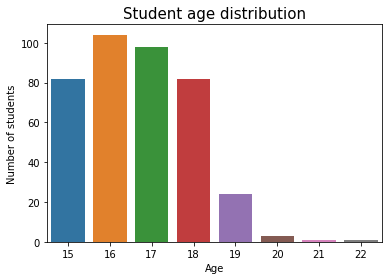

In [14]:
print("Student age distribution: ")
diagram_five = sns.countplot(x = dataset_one.toPandas()['age'])
diagram_five.set_xlabel('Age', fontsize = 10)
diagram_five.set_ylabel('Number of students', fontsize = 10)
diagram_five.axes.set_title('Student age distribution', fontsize = 15)
plt.show()

Student in Urban or rural areas distribution


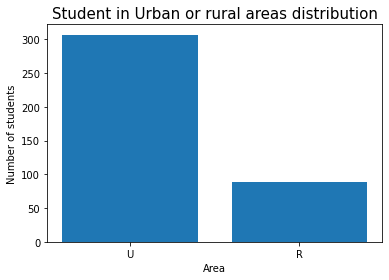

Number of students in urban area: 307
Number of students in rural area: 88


In [15]:
print("Student in Urban or rural areas distribution")
plt.xlabel('Area', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Student in Urban or rural areas distribution', fontsize = 15)
diagram_six = dataset_one.toPandas()['address'].value_counts()
plt.bar(diagram_six.index, diagram_six.values)
plt.show()

print('Number of students in urban area:', len(dataset_one.toPandas()[dataset_one.toPandas()['address'] == 'U']))
print('Number of students in rural area:', len(dataset_one.toPandas()[dataset_one.toPandas()['address'] == 'R']))

In [16]:
from pyspark.sql.functions import isnan, when, count, col
# 2.4 Verify the data quality
# missing value from freetime, dalc, walc, health field.
print("Missing value or null value in dataset one: ")
print(dataset_one.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset_one.columns]))
print()
print("Missing value or null value in dataset two: ")
print(dataset_two.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset_two.columns]).toPandas().transpose())

Missing value or null value in dataset one: 
DataFrame[id: bigint, school: bigint, sex: bigint, age: bigint, address: bigint, famsize: bigint, Pstatus: bigint, Medu: bigint, Fedu: bigint, Mjob: bigint, Fjob: bigint, reason: bigint, guardian: bigint, traveltime: bigint, studytime: bigint, failures: bigint, schoolsup: bigint, famsup: bigint, paid: bigint, activities: bigint, nursery: bigint, higher: bigint, internet: bigint, romantic: bigint, famrel: bigint, freetime: bigint, goout: bigint, Dalc: bigint, Walc: bigint, health: bigint, absences: bigint]

Missing value or null value in dataset two: 
    0
id  0
G1  0
G2  0
G3  0


In [17]:
# 3.4 integraet various data source
# combine the dataset
dataset_three = dataset_one.join(dataset_two, on=['id'])
print("Dataset one structure: " + str(dataset_three.count()) + " rows, and " + str(len(dataset_three.columns)) + " columns")

Dataset one structure: 395 rows, and 34 columns


In [18]:
# 2.3 Explore the data（more ploting)
# plot more diagram in this section

Students go out time: 


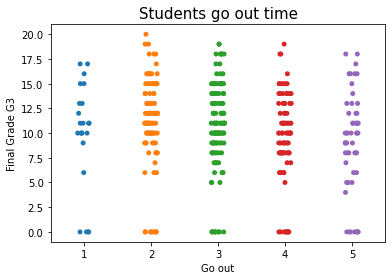

In [19]:
print("Students go out time: ")
diagram_seven = sns.stripplot(x = dataset_three.toPandas()['goout'], y = dataset_three.toPandas()["G3"])
diagram_seven.set_xlabel('Go out', fontsize = 10)
diagram_seven.set_ylabel('Final Grade G3', fontsize = 10)
diagram_seven.axes.set_title('Students go out time', fontsize = 15)
plt.show()

Students study time: 


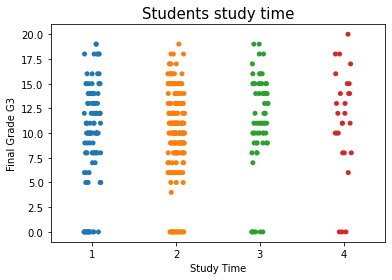

In [20]:
print("Students study time: ")
diagram_eight = sns.stripplot(x = dataset_three.toPandas()['studytime'], y = dataset_three.toPandas()["G3"])
diagram_eight.set_xlabel('Study Time', fontsize = 10)
diagram_eight.set_ylabel('Final Grade G3', fontsize = 10)
diagram_eight.axes.set_title('Students study time', fontsize = 15)
plt.show()

Mother's job:


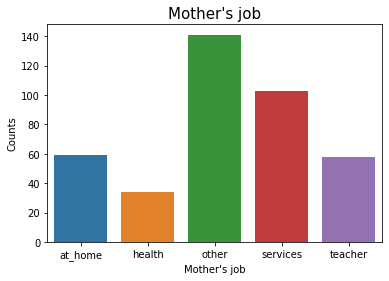

In [21]:
print("Mother's job:")
diagram_nine = sns.countplot(x = dataset_three.toPandas()["Mjob"])
diagram_nine.set_xlabel("Mother's job", fontsize = 10)
diagram_nine.set_ylabel('Counts', fontsize = 10)
diagram_nine.axes.set_title("Mother's job", fontsize = 15)
plt.show()

Father's job:


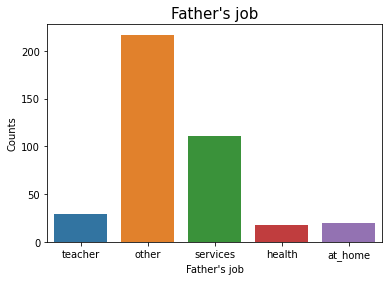

In [22]:
print("Father's job:")
diagram_ten = sns.countplot(x = dataset_three.toPandas()["Fjob"])
diagram_ten.set_xlabel("Father's job", fontsize = 10)
diagram_ten.set_ylabel('Counts', fontsize = 10)
diagram_ten.axes.set_title("Father's job", fontsize = 15)
plt.show()

Father's education level:


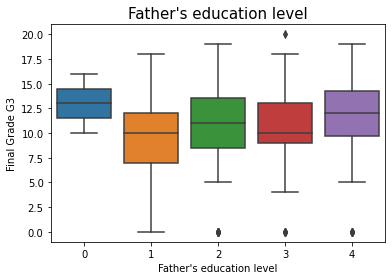

In [23]:
print("Father's education level:")
diagram_eleven = sns.boxplot(x = dataset_three.toPandas()["Fedu"], y = dataset_three.toPandas()["G3"])
diagram_eleven.set_xlabel("Father's education level", fontsize = 10)
diagram_eleven.set_ylabel('Final Grade G3', fontsize = 10)
diagram_eleven.axes.set_title("Father's education level", fontsize = 15)
plt.show()

Mother's education level:


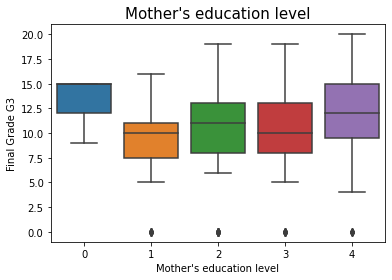

In [24]:
print("Mother's education level:")
diagram_twelve = sns.boxplot(x = dataset_three.toPandas()["Medu"], y = dataset_three.toPandas()["G3"])
diagram_twelve.set_xlabel("Mother's education level", fontsize = 10)
diagram_twelve.set_ylabel('Final Grade G3', fontsize = 10)
diagram_twelve.axes.set_title("Mother's education level", fontsize = 15)
plt.show()

In [25]:
# 3.2 Clean the data
# removing the missing value
print("Dataset three length before removing the missing value:", dataset_three.count())
dataset_three = dataset_three.na.drop()
print("Dataset three length after removing the missing value:", dataset_three.count())

Dataset three length before removing the missing value: 395
Dataset three length after removing the missing value: 387


In [26]:
# 3.5 Format the data as required
print("Data type inside the dataset three before formating: ")
dataset_three.dtypes

Data type inside the dataset three before formating: 


[('id', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'double'),
 ('goout', 'int'),
 ('Dalc', 'double'),
 ('Walc', 'double'),
 ('health', 'double'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int')]

In [27]:
types = dict(dataset_three.dtypes)
column_names = []
for key, value in types.items():
    if value == 'string':
        column_names.append(key)
print(column_names)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [28]:
# The following code convert the string type field to catagorical value
from pyspark.ml.feature import StringIndexer
for item in column_names:
    indexer = StringIndexer(inputCol=str(item), outputCol= str(item) + '_index')
    dataset_three = indexer.fit(dataset_three).transform(dataset_three)
for item in column_names:
    dataset_three = dataset_three.drop(item)

In [29]:
dataset_three.dtypes

[('id', 'int'),
 ('age', 'int'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('famrel', 'int'),
 ('freetime', 'double'),
 ('goout', 'int'),
 ('Dalc', 'double'),
 ('Walc', 'double'),
 ('health', 'double'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int'),
 ('school_index', 'double'),
 ('sex_index', 'double'),
 ('address_index', 'double'),
 ('famsize_index', 'double'),
 ('Pstatus_index', 'double'),
 ('Mjob_index', 'double'),
 ('Fjob_index', 'double'),
 ('reason_index', 'double'),
 ('guardian_index', 'double'),
 ('schoolsup_index', 'double'),
 ('famsup_index', 'double'),
 ('paid_index', 'double'),
 ('activities_index', 'double'),
 ('nursery_index', 'double'),
 ('higher_index', 'double'),
 ('internet_index', 'double'),
 ('romantic_index', 'double')]

In [30]:
# 3.2 Clean the data (part two)
# removing the outliers value
import numpy as np
from scipy import stats
print("Dataset three length before removing the outliers value:", dataset_three.count())
dataset_three_z = np.abs(stats.zscore(dataset_three.toPandas()))
threshold = 5
dataset_three = spark.createDataFrame((dataset_three.toPandas())[(dataset_three_z <= threshold).all(axis=1)])
print("Dataset three length after removing the outliers value:", dataset_three.count())

Dataset three length before removing the outliers value: 387
Dataset three length after removing the outliers value: 384


In [31]:
# 4.1 Reduce the data
# Find correlations with the Grade
# dataset_three_correlated_fileds = dataset_three.corr()['G3'].sort_values(ascending=False)
from pyspark.mllib.stat import Statistics
def compute_correlation_matrix(df, method='pearson'):
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df
# need to pring the results.
dataset_three_correlated_fileds = compute_correlation_matrix(dataset_three)


In [32]:
dataset_three_correlated_fileds = dataset_three_correlated_fileds.G3.sort_values(ascending=False)
dataset_three_correlated_fileds

G3                  1.000000
G2                  0.903329
G1                  0.800762
Medu                0.212347
Fedu                0.158774
reason_index        0.129747
Mjob_index          0.105370
studytime           0.096361
paid_index          0.095139
sex_index           0.089416
Fjob_index          0.081376
famsize_index       0.065449
absences            0.063318
Pstatus_index       0.049089
famrel              0.047334
famsup_index        0.041279
freetime            0.011508
activities_index   -0.016997
school_index       -0.042730
guardian_index     -0.046371
nursery_index      -0.047706
Dalc               -0.053773
Walc               -0.054663
health             -0.060713
schoolsup_index    -0.082580
id                 -0.086843
internet_index     -0.090203
address_index      -0.101616
traveltime         -0.111287
romantic_index     -0.124596
goout              -0.131369
age                -0.156162
higher_index       -0.183464
failures           -0.362203
Name: G3, dtyp

In [33]:
# 4.2 Project the data
# Removed
# Will only grabe the top 10 most correlation features for the further study
dataset_three_correlated_fileds = list(dataset_three_correlated_fileds.index[0:16])
print(dataset_three_correlated_fileds)
dataset_three = dataset_three.select(dataset_three_correlated_fileds)
print("\nThe final dataset strucure after cleaning and data transformation: " + str(dataset_three.count()) + " rows, and " + str(len(dataset_three.columns)) + " columns")

['G3', 'G2', 'G1', 'Medu', 'Fedu', 'reason_index', 'Mjob_index', 'studytime', 'paid_index', 'sex_index', 'Fjob_index', 'famsize_index', 'absences', 'Pstatus_index', 'famrel', 'famsup_index']

The final dataset strucure after cleaning and data transformation: 384 rows, and 16 columns


G1 vs G3


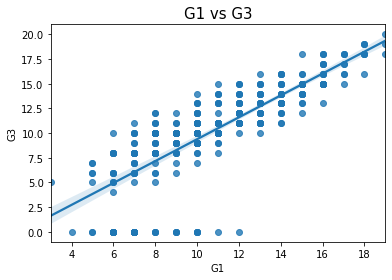

In [34]:
# Data-mining method(s) selection
print("G1 vs G3")
diagram_thirteen = sns.regplot(x = dataset_three.toPandas()["G1"], y = dataset_three.toPandas()["G3"])
diagram_thirteen.set_xlabel("G1", fontsize = 10)
diagram_thirteen.set_ylabel('G3', fontsize = 10)
diagram_thirteen.axes.set_title("G1 vs G3", fontsize = 15)
plt.show()

G2 vs G3


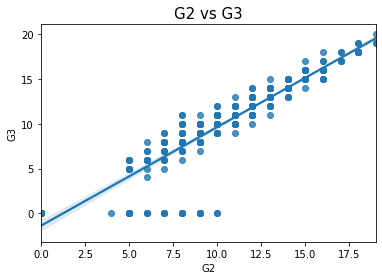

In [35]:
print("G2 vs G3")
diagram_fourteen = sns.regplot(x = dataset_three.toPandas()["G2"], y = dataset_three.toPandas()["G3"])
diagram_fourteen.set_xlabel("G2", fontsize = 10)
diagram_fourteen.set_ylabel('G3', fontsize = 10)
diagram_fourteen.axes.set_title("G2 vs G3", fontsize = 15)
plt.show()

In [36]:
# Traning with Linear regression model
from pyspark.ml.regression import LinearRegression
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [37]:
# Grabed the input variables, 'G3' is the label value so exclude it.
dataset_three_correlated_fileds[1:]

['G2',
 'G1',
 'Medu',
 'Fedu',
 'reason_index',
 'Mjob_index',
 'studytime',
 'paid_index',
 'sex_index',
 'Fjob_index',
 'famsize_index',
 'absences',
 'Pstatus_index',
 'famrel',
 'famsup_index']

In [38]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=dataset_three_correlated_fileds[1:],
    outputCol="features")

In [39]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(dataset_three)

In [40]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'G3')
final_data.show()

+--------------------+---+
|            features| G3|
+--------------------+---+
|[6.0,5.0,4.0,4.0,...|  6|
|(15,[0,1,2,3,5,6,...|  6|
|[8.0,7.0,1.0,1.0,...| 10|
|[14.0,15.0,4.0,2....| 15|
|[10.0,6.0,3.0,3.0...| 10|
|[12.0,12.0,2.0,2....| 11|
|[5.0,6.0,4.0,4.0,...|  6|
|[15.0,14.0,3.0,4....| 15|
|[8.0,10.0,4.0,4.0...|  9|
|[12.0,10.0,2.0,1....| 12|
|[14.0,14.0,4.0,4....| 14|
|[10.0,10.0,4.0,3....| 11|
|[16.0,14.0,2.0,2....| 16|
|[14.0,14.0,4.0,4....| 14|
|[14.0,13.0,4.0,4....| 14|
|[5.0,6.0,3.0,2.0,...|  5|
|[10.0,8.0,4.0,3.0...| 10|
|[14.0,13.0,4.0,3....| 15|
|[15.0,12.0,4.0,4....| 15|
|[9.0,10.0,2.0,4.0...|  8|
+--------------------+---+
only showing top 20 rows



In [41]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [42]:
lr = LinearRegression(labelCol='G3')
# Fit the model to the data.
lrModel = lr.fit(train_data)

In [43]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [1.0124477015346078,0.13350821452588002,0.0029015537233471928,-0.02066622997465795,-0.0011785317324379593,0.002611049483299055,-0.15043266966949512,0.09096664389607739,0.06443105271588838,0.03484758260122899,0.05784844740298553,0.05627904210709613,0.11724255757423117,0.4649810117455858,-0.19656611371286983] Intercept: -3.719333955138851


In [48]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [49]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|  -6.93102417984689|
| 2.0998289454862267|
| 0.7406094251860544|
| 1.9185743477127701|
| 0.5434978571165328|
| -3.900918457227942|
| 0.4563508328806556|
|0.27567163561755237|
|  0.996580329031346|
| 2.0863824053874467|
|   0.82893109499553|
| 0.8060224650985695|
| 1.4118611909021839|
| 1.1491321713433926|
| 2.7171182520691115|
|  1.869737435123973|
|  -4.60532078268022|
| -5.274412388679163|
|  3.513514043126353|
| -5.778152279375691|
+-------------------+
only showing top 20 rows

RSME: 2.0368678476416595


In [46]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.8029723642497606


In [47]:
final_data.describe().show()

+-------+------------------+
|summary|                G3|
+-------+------------------+
|  count|               384|
|   mean|10.380208333333334|
| stddev| 4.602329295414341|
|    min|                 0|
|    max|                20|
+-------+------------------+



In [91]:
# Gradient-boosted tree regression
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [92]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [93]:
gbt = GBTRegressor(labelCol = 'G3', featuresCol = 'features', maxIter=10)

In [94]:
gbt_model = gbt.fit(train_data)

In [95]:
test_results = gbt_model.transform(test_data)

In [96]:
test_results

DataFrame[features: vector, G3: bigint, prediction: double]

In [97]:
evaluator = RegressionEvaluator(
    labelCol="G3", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(test_results)

In [98]:
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.30043


In [99]:
evaluator = RegressionEvaluator(
    labelCol="G3", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(test_results)
print("r2 on test data = %g" % r2)

r2 on test data = 0.737618


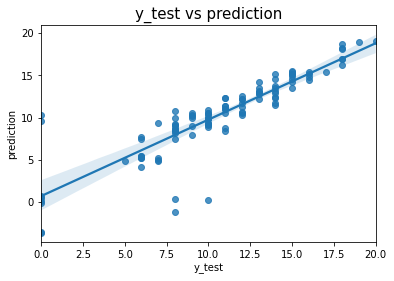

In [111]:
diagram_fifteen = sns.regplot(x = test_results.select('G3').toPandas(), y = test_results.select('prediction').toPandas())
diagram_fifteen.set_xlabel("y_test", fontsize = 10)
diagram_fifteen.set_ylabel('prediction', fontsize = 10)
diagram_fifteen.axes.set_title("y_test vs prediction", fontsize = 15)
plt.show()

In [112]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [113]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [114]:
rf = RandomForestRegressor(labelCol="G3", predictionCol="prediction")

In [115]:
rf_model = rf.fit(train_data)

In [116]:
test_results = rf_model.transform(test_data)
test_results

DataFrame[features: vector, G3: bigint, prediction: double]

In [117]:
evaluator = RegressionEvaluator(
    labelCol="G3", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(test_results)

In [118]:
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.17392


In [119]:
evaluator = RegressionEvaluator(
    labelCol="G3", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(test_results)
print("Root Mean Squared Error (RMSE) on test data = %g" % r2)

Root Mean Squared Error (RMSE) on test data = 0.811936
